CLASSIFICATION


In [75]:
#Fetching dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

c:\Users\vansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [76]:
import requests

def download_data(url):
    try:
        response = requests.get(url, timeout=10)  # Adjust timeout as needed
        response.raise_for_status()  # Raise an exception for error HTTP status codes
        return response.content
    except requests.exceptions.RequestException as e:
        print(f"Error downloading data: {e}")
        # Handle the error


In [77]:
download_data('https://www.kaggle.com/datasets/hojjatk/mnist-dataset')

Error downloading data: HTTPSConnectionPool(host='www.kaggle.com', port=443): Max retries exceeded with url: /datasets/hojjatk/mnist-dataset (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000023C42ACEAE0>: Failed to resolve 'www.kaggle.com' ([Errno 11001] getaddrinfo failed)"))


In [78]:
import time
from sklearn.datasets import fetch_openml

def fetch_mnist_with_retry(max_retries=3, base_delay=2):
    for attempt in range(max_retries):
        try:
            mnist = fetch_openml('mnist_784', as_frame=False)
            return mnist
        except Exception as e:
            print(f"Error fetching MNIST: {e}")
            time.sleep(base_delay * 2**attempt)
    raise Exception("Failed to fetch MNIST after multiple retries")

mnist = fetch_mnist_with_retry()


In [79]:
from sklearn.datasets import fetch_openml
mnist= fetch_openml('mnist_784', as_frame=False)

In [80]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [81]:
X,y = mnist.data, mnist.target

In [82]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [83]:
X.shape

(70000, 784)

In [84]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [85]:
y.shape

(70000,)

In [86]:
mnist.data.shape

(70000, 784)

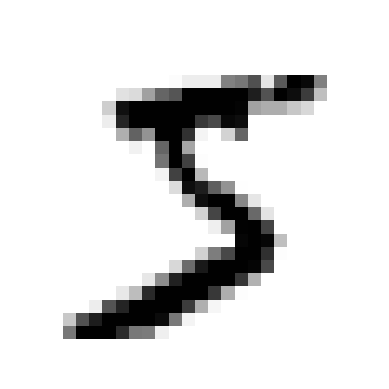

In [87]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [88]:
y[0]

'5'

In [89]:
X_train, X_test, y_train, y_test = X[:6000], X[6000:], y[:6000], y[6000:]

#Binary Classification

training a binary classifier


In [90]:
y_train_5 = (y_train == '5') #True for  all 5s, False for all other digits
y_test_5 = (y_test == '5')

In [91]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [92]:
sgd_clf.predict([some_digit])

array([ True])

* Performance Measures


Measuring Accuracy Using Cross-Validation

In [93]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.962 , 0.956 , 0.9665])

In [94]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train))) #Prints false: no 5s detected

False


In [95]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.914 , 0.9145, 0.9145])


implementing Crossvalidation

In [96]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3) #add shuffle=True if the dataset is not already shuffled
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_test[test_index]
    y_test_folds = y_test_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct/len(y_pred)) #prints acc
    

0.964
0.9565
0.97


Confusion Matrix


In [97]:
from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [98]:
y_train_5

array([ True, False, False, ..., False, False, False])

In [99]:
y_train_predict

array([False, False, False, ..., False, False, False])

In [100]:
print(y_train_predict)

[False False False ... False False False]


In [101]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_predict)
cm

array([[5375,  111],
       [ 120,  394]], dtype=int64)

In [102]:
y_train_perfect_predictions = y_train_5 #preted we reach perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)


array([[5486,    0],
       [   0,  514]], dtype=int64)

Precision and Recall

In [103]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_predict)


0.7801980198019802

In [104]:
recall_score(y_train_5, y_train_predict)

0.7665369649805448

f1 Score

In [105]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_predict)

0.7733071638861628

Precision Recall Tradeoff

In [106]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores


array([38042.34312442])

In [107]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [108]:
y_some_digit_pred

array([ True])

In [109]:
threshold = 50000
y_some_digit_pred = (y_scores > threshold)

In [110]:
y_some_digit_pred

array([False])

In [111]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [112]:
from sklearn.metrics import precision_recall_curve
precisions , recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

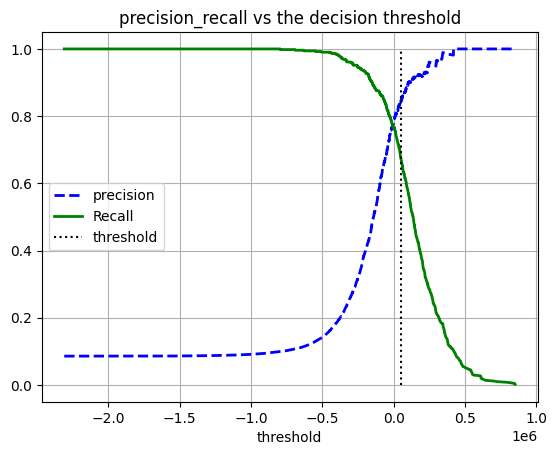

<Figure size 1600x900 with 0 Axes>

In [113]:
plt.plot(thresholds, precisions[:-1], "b--", label="precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.legend()
plt.xlabel('threshold')
plt.grid(50)
plt.title('precision_recall vs the decision threshold')
#beautify the figure:  add grid, legend, axis, labels and circles
plt.figure(figsize=(16,9))

plt.show()

Text(0.5, 1.0, 'precision versus recall')

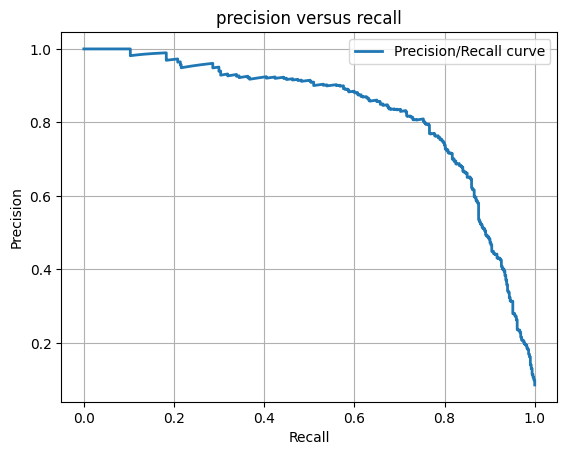

In [114]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

plt.legend()
plt.xlabel('Recall')
plt.ylabel("Precision")
plt.grid(50)
plt.title('precision versus recall')

In [115]:
idx_for_90_precision = (precisions > 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

105660.23702487056

In [116]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)


In [117]:
precision_score(y_train_5, y_train_pred_90)

0.9012345679012346

In [118]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.5680933852140078

In [119]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

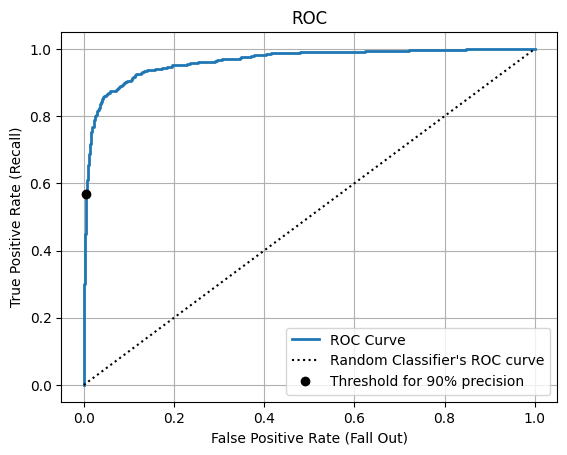

In [120]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label="ROC Curve")

plt.plot([0,1], [0,1], 'k:', label= "Random Classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

plt.legend()
plt.xlabel('False Positive Rate (Fall Out)')
plt.ylabel("True Positive Rate (Recall)")
plt.grid(50)
plt.title('ROC')
plt.show()

In [121]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9641599203348885

In [122]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)


In [123]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [124]:
y_probas_forest[:2]

array([[0.37, 0.63],
       [0.98, 0.02]])

In [125]:
y_scores_forest =y_probas_forest[:,1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)


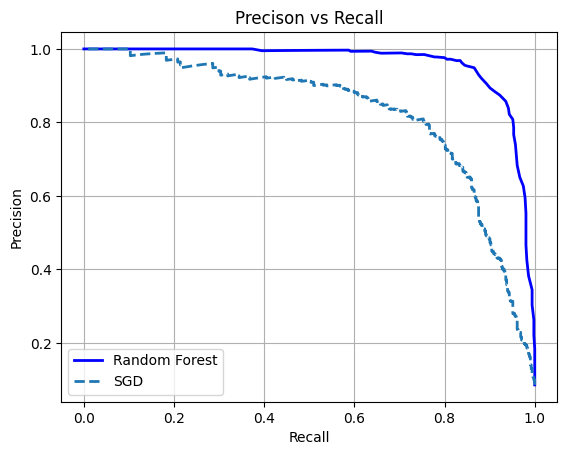

In [126]:
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls, precisions,"--", linewidth=2, label="SGD")

plt.legend()
plt.xlabel('Recall')
plt.ylabel("Precision")
plt.grid(50)
plt.title('Precison vs Recall')
plt.show()


In [127]:
y_train_pred_forest = y_probas_forest[:,1] >= 0.5 #positive proba >= 50%


In [128]:
f1_score(y_train_5, y_train_pred_forest)


0.8105625717566016

In [129]:
roc_auc_score(y_train_5, y_scores_forest)

0.9936162229715256

In [130]:
precision_score(y_train_5, y_train_pred_forest)

0.988795518207283

In [131]:
recall_score(y_train_5, y_train_pred_forest)

0.6867704280155642

#Multiclass Classification

In [132]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [133]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [134]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [135]:
some_digit_scores

array([[ 3.79297828,  0.72949369,  6.06184129,  8.29800527, -0.29383983,
         9.30157597,  1.74723215,  2.77365456,  7.20601456,  4.82245092]])

In [136]:
class_id = some_digit_scores.argmax()
class_id

5

In [137]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [138]:
svm_clf.classes_[class_id]

'5'

In [139]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [140]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [141]:
len(ovr_clf.estimators_)

10

In [142]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [143]:
sgd_clf.decision_function([some_digit]).round()

array([[-735712., -857058., -281086.,    8290., -616793.,   29040.,
        -492305., -834395., -318385., -363474.]])

In [144]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8565, 0.8715, 0.8635])

In [145]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8705, 0.8985, 0.8925])

#Error Analysis


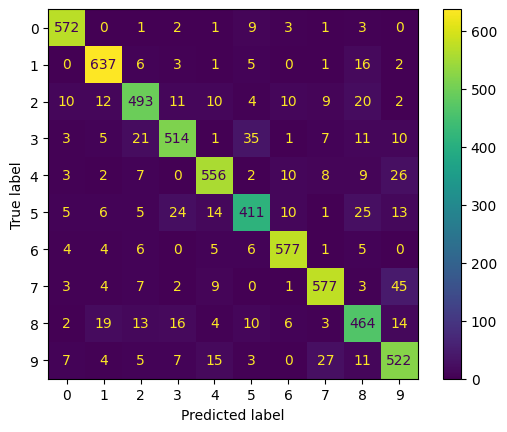

In [146]:
from sklearn.metrics import ConfusionMatrixDisplay
 
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

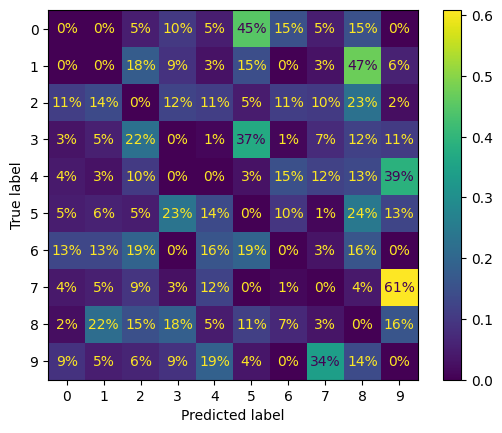

In [147]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight= sample_weight, normalize="true", values_format=".0%")
plt.show()

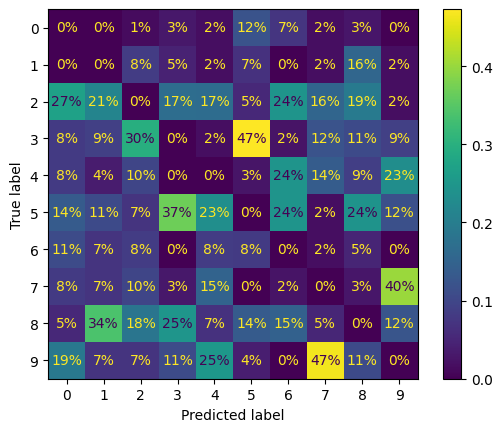

In [148]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight= sample_weight, normalize="pred", values_format=".0%")
plt.show()

In [149]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

#Multilabel Classification

In [166]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >="7")
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [167]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [168]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [169]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9500922726736858

In [170]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9529944300252725

In [171]:
from sklearn.multioutput import ClassifierChain
chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [172]:
chain_clf.predict([some_digit])

array([[0., 1.]])

#Multi Output Classification

In [174]:
np.random.seed(42) #to make this code example reproducible
noise = np.random.randint(0,100,(len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod =X_train
y_test_mod =X_test

In [176]:

import matplotlib.cm as cm


def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=plt.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()


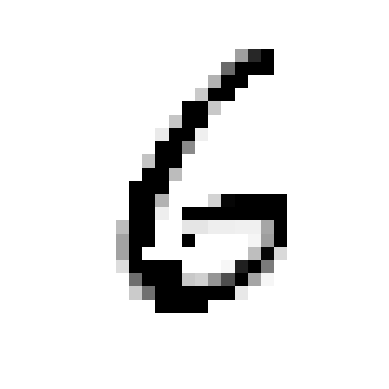

In [177]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()